## House Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
1. Data understanding 
2. Data Cleaning
3. Exploratory data analysis
4. Data preparation
5. Model building and evaluation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import linear_model,metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.feature_selection import RFE


import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [2]:
# reading the dataset
data = pd.read_csv('train.csv')

### 1. Data Understanding

Let's first have a look at the dataset and understand the size, attribute names etc.

In [3]:
data.head(3).append(data.tail(3))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
# summary of the dataset: 1460 rows, 81 columns
data.shape

(1460, 81)

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2. Data Cleaning

In [7]:
#Dropping TotalBsmtSF as it is the sum of BsmtFinSF1 and BsmtFinSF2
#Dropping Id,YrSold,MoSold as this column is insignificant for our analysis
data.drop(['Id','TotalBsmtSF', 'YrSold', 'MoSold'],axis=1,inplace=True)

In [8]:
#Checking the null values for each column
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [9]:
#Calculating the percentage of null values for each column
null_perc = round((data.isnull().sum()/len(data.index)*100),2)

In [10]:
#Displaying the percentage of null values for each column
null_perc[ null_perc > 0 ]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [11]:
#Dropping the columns where null values are more than 30%
data.drop(null_perc[null_perc > 30 ].index,axis=1,inplace=True)

In [12]:
#Checking the column remaing in the dataset
data.shape

(1460, 72)

In [13]:
#Checking the null values in each column
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath     

In [14]:
null_perc[ null_perc > 0 ]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [15]:
#Dropping the rows with null values in columns MasVnrType,BsmtQual,GarageType,Electrical,BsmtExposure,BsmtFinType2 as relatively less rows have null values
data.dropna(axis = 0, subset = ['MasVnrType','BsmtQual','GarageType','Electrical','BsmtExposure','BsmtFinType2'] , inplace = True)

In [16]:
#Checking the null values for each column again
data.isnull().sum()
#Only LotFrontage null values need to be imputed

MSSubClass         0
MSZoning           0
LotFrontage      244
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath     

In [17]:
#Checking the shape of the data
data.shape

(1338, 72)

In [18]:
#Displaying the rows where LotFrontage is null
data[data['LotFrontage'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,WD,Normal,200000
12,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,0,WD,Normal,144000
14,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,0,WD,Normal,157000
16,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,700,WD,Normal,149000
24,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,0,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,20,RL,NaN,12546,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,0,WD,Normal,182900
1431,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,0,WD,Normal,143750
1441,120,RM,NaN,4426,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,0,WD,Normal,149300
1443,30,RL,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,Grav,Fa,N,FuseF,952,0,0,952,0,0,1,0,2,1,Fa,4,Typ,1,Detchd,1916.0,Unf,1,192,Fa,Po,P,0,98,0,0,40,0,0,WD,Normal,121000


In [19]:
data['LotFrontage'].describe()

count    1094.000000
mean       70.759598
std        24.508859
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

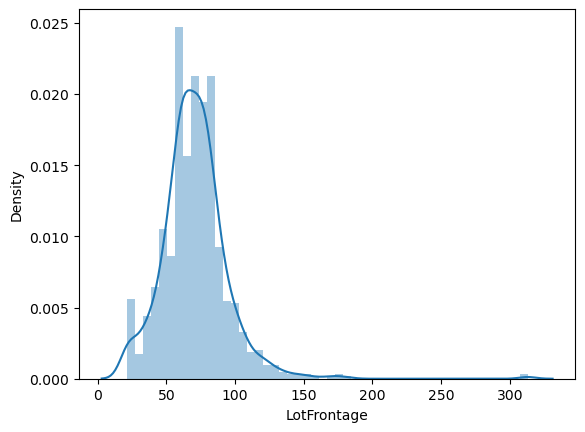

In [20]:
# Plotting Column LotFrontage
sns.distplot(data['LotFrontage'])
plt.show()
# LotFrontage is right skewed therefore we will use median and not mean

In [21]:
data['LotFrontage'].median()

70.0

In [22]:
data['LotFrontage'].mean()

70.75959780621572

In [23]:
#Imputing the null values with median
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

In [24]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [25]:
# Changing values in categorical columns MSSubClass, OverallQual, OverallCond to more meaningful values as per the data dictionary
data['MSSubClass']=data['MSSubClass'].replace({
        20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

data['OverallQual']=data['OverallQual'].replace({ 
       10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

data['OverallCond']=data['OverallCond'].replace({ 
       10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

##### Feature Engineering

In [26]:
# Calcultaing HouseAge, YearsSinceRemod (Years since remodelling), GarageAge
from datetime import datetime
data['HouseAge'] = datetime.now().year - data['YearBuilt'] 
data['YearsSinceRemod'] = datetime.now().year - data['YearRemodAdd']
data['GarageAge'] = datetime.now().year - data['GarageYrBlt']

In [27]:
# Dropping columns YearBuilt,YearRemodAdd,GarageYrBlt as the columns are now redundant
data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)

In [28]:
data.head(3).append(data.tail(3))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,HouseAge,YearsSinceRemod,GarageAge
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,20,20,20.0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,47,47,47.0
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,22,21,22.0
1457,2-STORY 1945 & OLDER,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Excellent,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,WD,Normal,266500,82,17,82.0
1458,1-STORY 1946 & NEWER ALL STYLES,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Average,Above Average,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,WD,Normal,142125,73,27,73.0
1459,1-STORY 1946 & NEWER ALL STYLES,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Average,Above Average,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,Attchd,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,0,WD,Normal,147500,58,58,58.0


In [29]:
# Checking data types
data.dtypes

MSSubClass          object
MSZoning            object
LotFrontage        float64
LotArea              int64
Street              object
LotShape            object
LandContour         object
Utilities           object
LotConfig           object
LandSlope           object
Neighborhood        object
Condition1          object
Condition2          object
BldgType            object
HouseStyle          object
OverallQual         object
OverallCond         object
RoofStyle           object
RoofMatl            object
Exterior1st         object
Exterior2nd         object
MasVnrType          object
MasVnrArea         float64
ExterQual           object
ExterCond           object
Foundation          object
BsmtQual            object
BsmtCond            object
BsmtExposure        object
BsmtFinType1        object
BsmtFinSF1           int64
BsmtFinType2        object
BsmtFinSF2           int64
BsmtUnfSF            int64
Heating             object
HeatingQC           object
CentralAir          object
E

In [30]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 

### 3. Exploratory Data Analysis

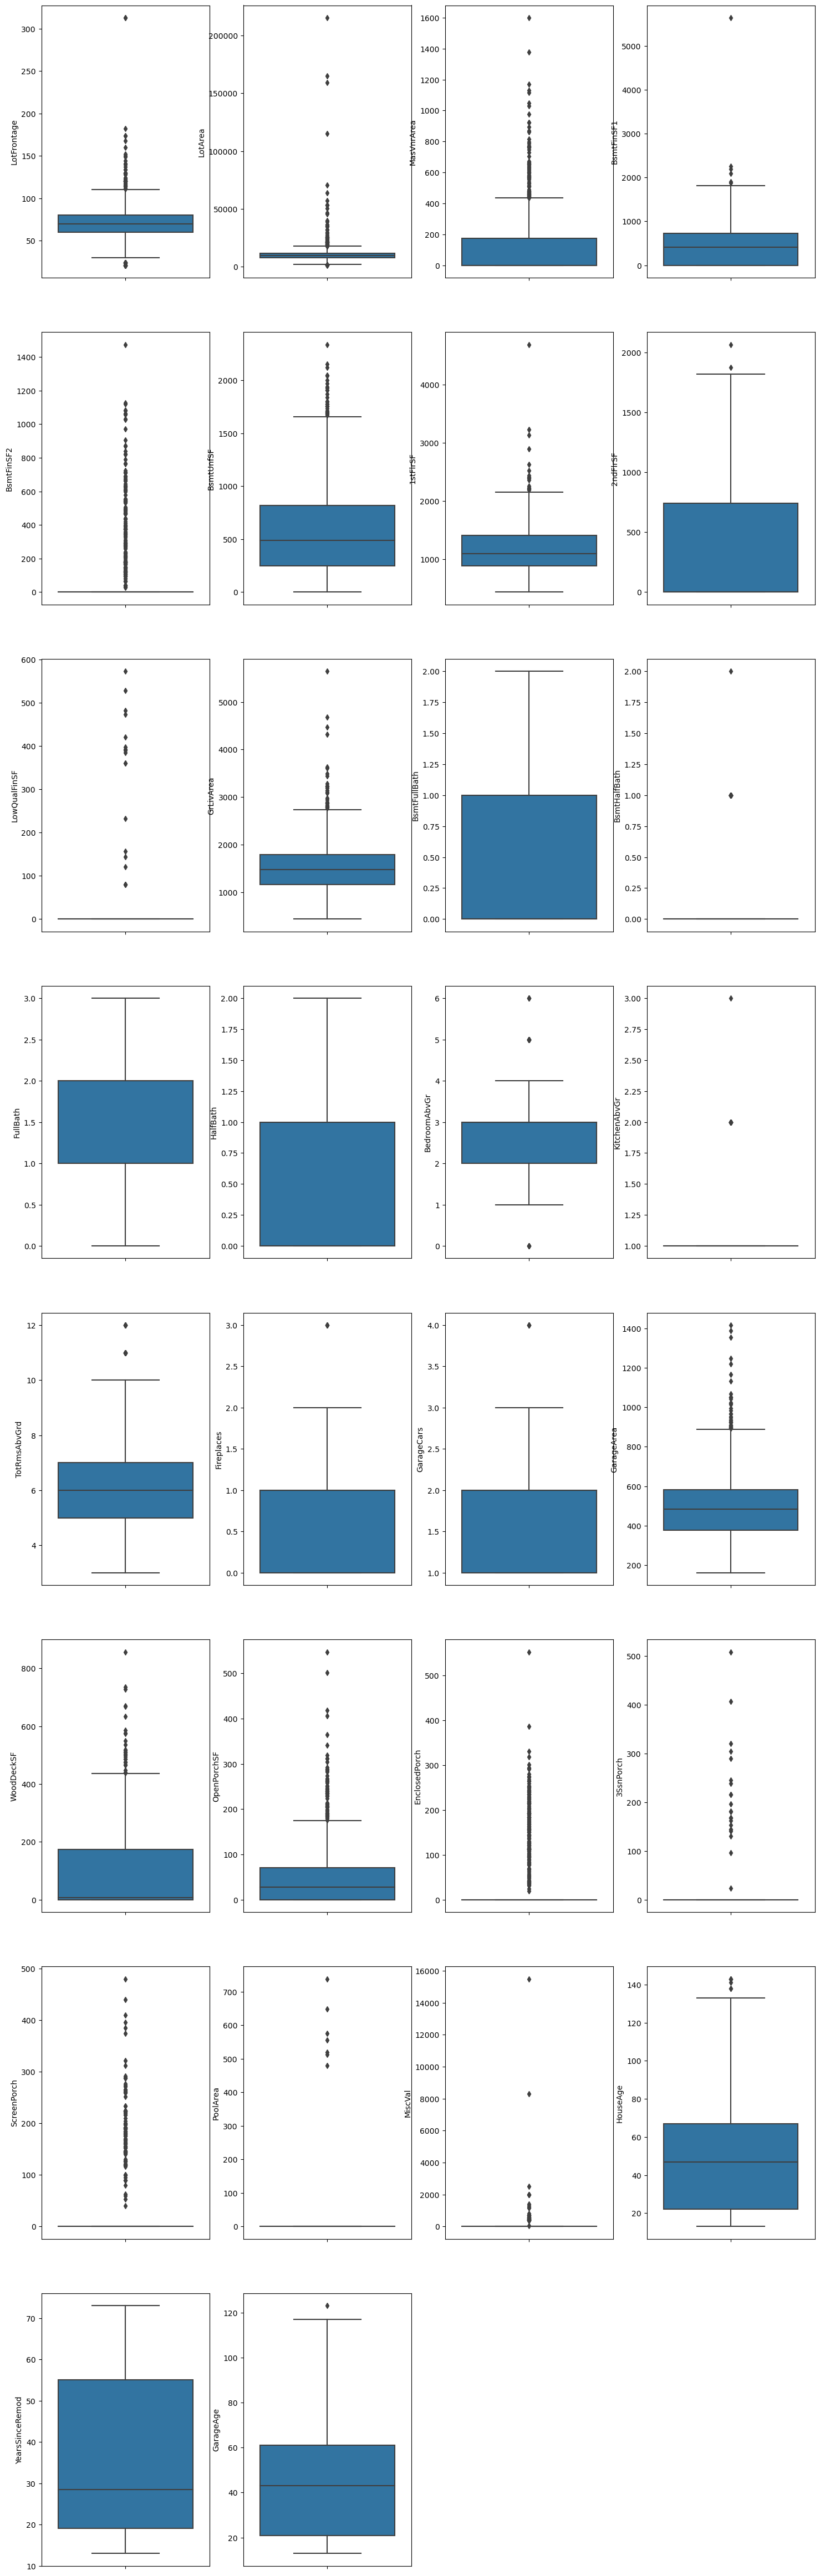

In [31]:
# Outlier detection for the numeric columns
num_cols = ['LotFrontage', 'LotArea','MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', 
       '2ndFlrSF', 'LowQualFinSF','GrLivArea', 
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
       'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 
       'TotRmsAbvGrd','Fireplaces','GarageCars', 
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch','ScreenPorch', 
       'PoolArea', 'MiscVal','HouseAge',
       'YearsSinceRemod','GarageAge']

plt.figure(figsize=(18,60))

i = 1
for col in num_cols:
    plt.subplot(8,4,i)
    sns.boxplot(y=col, data=data)
    i+=1


##### There are some outliers but we will not remove them as the given dataset only has 1400 rows

In [32]:
# cat_cols has all the categorical columns
cat_cols = ['MSSubClass', 'MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 
       'LotConfig', 'LandSlope', 'Neighborhood', 
       'Condition1', 'Condition2', 'BldgType', 
       'HouseStyle', 'OverallQual', 'OverallCond', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 
       'Exterior2nd', 'MasVnrType', 'ExterQual', 
       'ExterCond', 'Foundation', 'BsmtQual', 
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating', 'HeatingQC', 
       'CentralAir', 'Electrical', 'KitchenQual', 
       'Functional', 'GarageType', 'GarageFinish', 
       'GarageQual', 'GarageCond', 'PavedDrive', 
       'SaleType', 'SaleCondition']

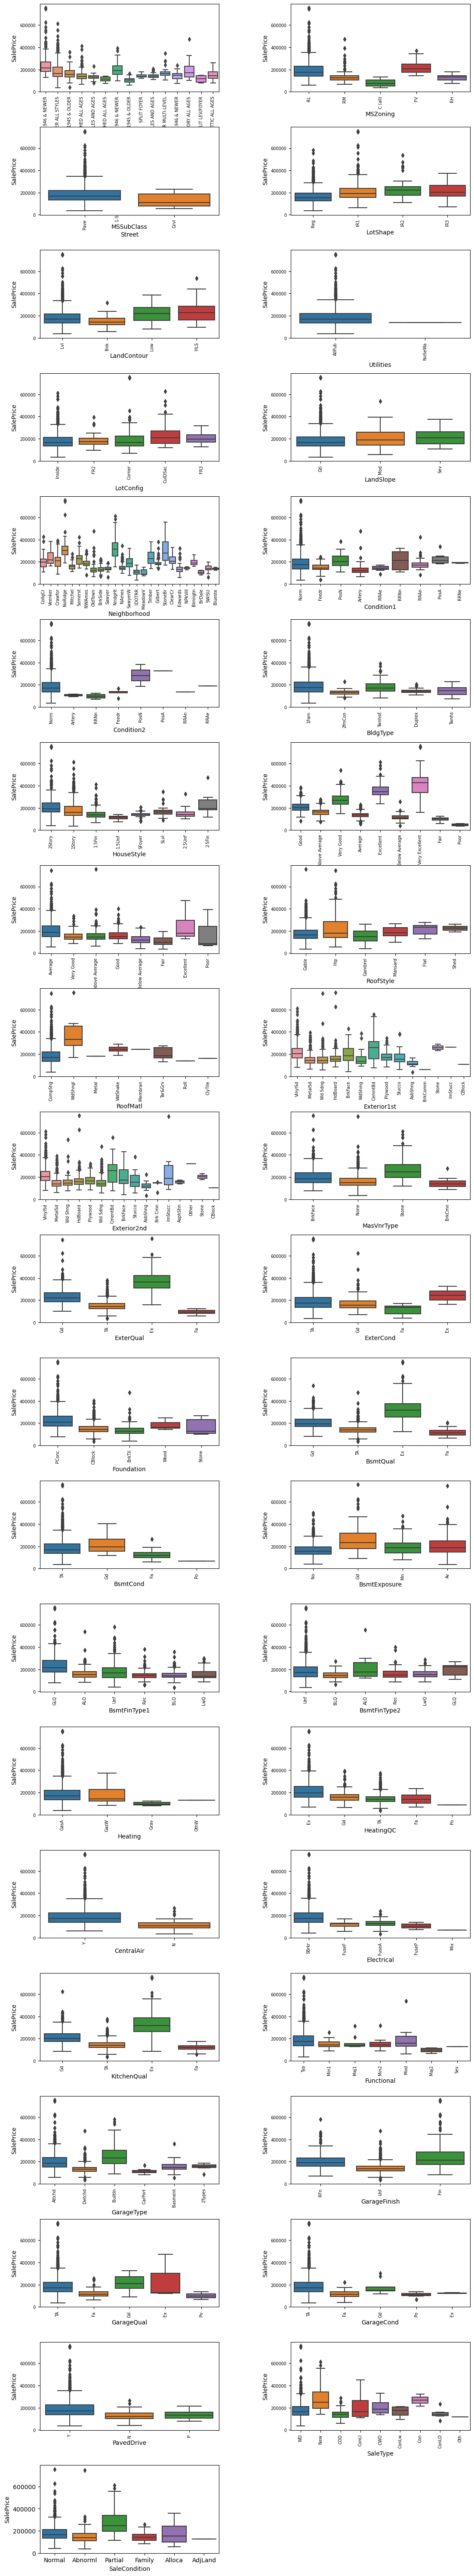

In [33]:
# Checking how different categorical columns affect SalePrice using boxplots on segments of data
plt.figure(figsize=(25,650))

plt.subplots_adjust(left=0.1,
                    bottom=0.5,
                    right=0.5,
                    top=0.6,
                    wspace=0.4,
                    hspace=0.4)
i = 1
for col in cat_cols:
    plt.xticks(rotation=90)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.subplot(23,2,i)
    sns.boxplot(x =col, y ='SalePrice', data = data)
    i+=1

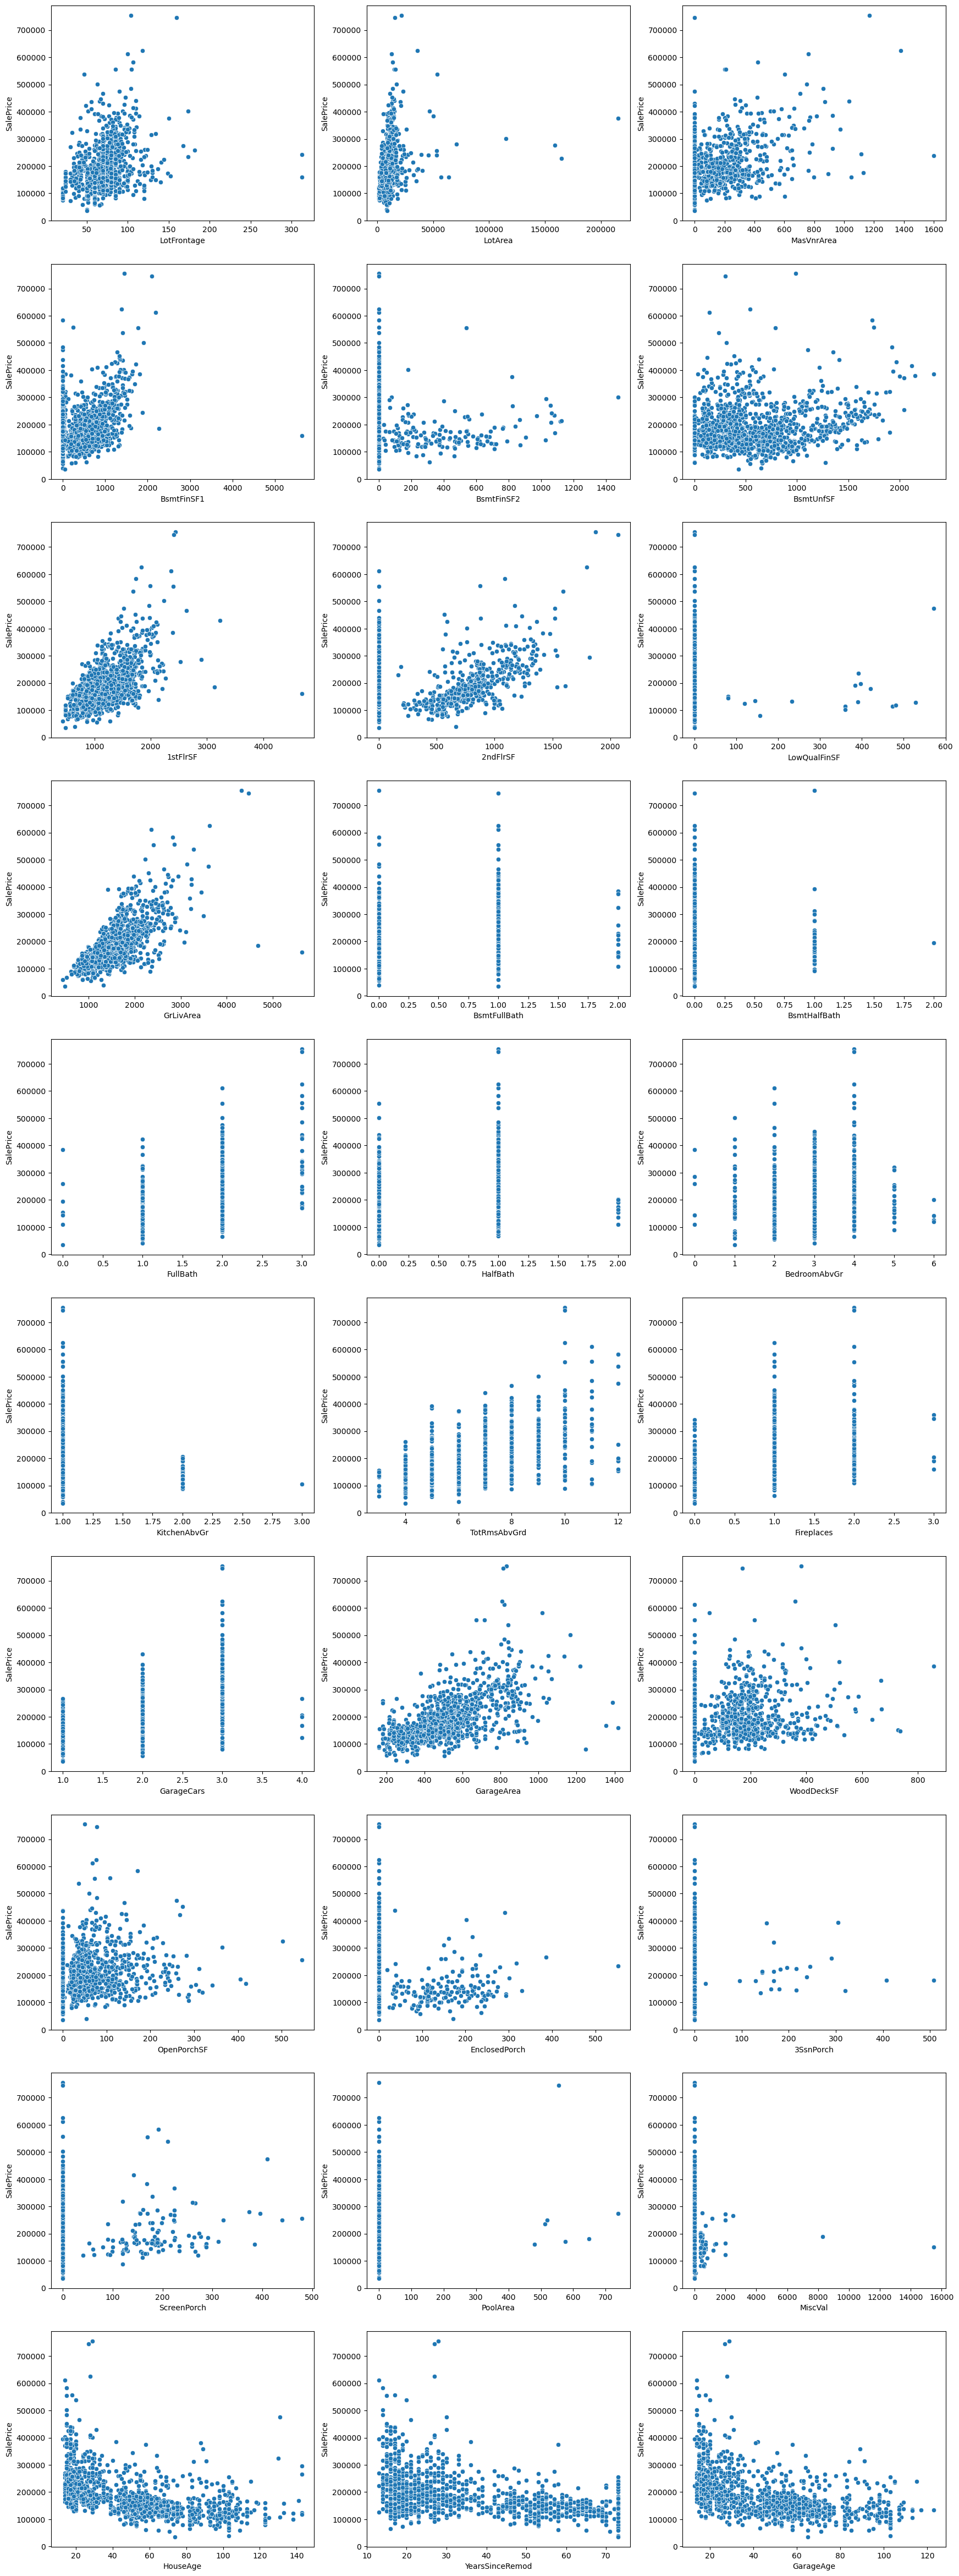

In [34]:
# Using Scatterplot for numerical columns and SalePrice to check if linear relationship exists
plt.figure(figsize=(21,60))

i = 1
for col in num_cols:
    plt.subplot(10,3,i)
    sns.scatterplot(x = col, y ='SalePrice', data = data)
    i+=1

#### Target column has a weak linear relationship with BsmtFinSF1, 2ndFlrSF,1stFlrSF,GrLivArea,GarageArea

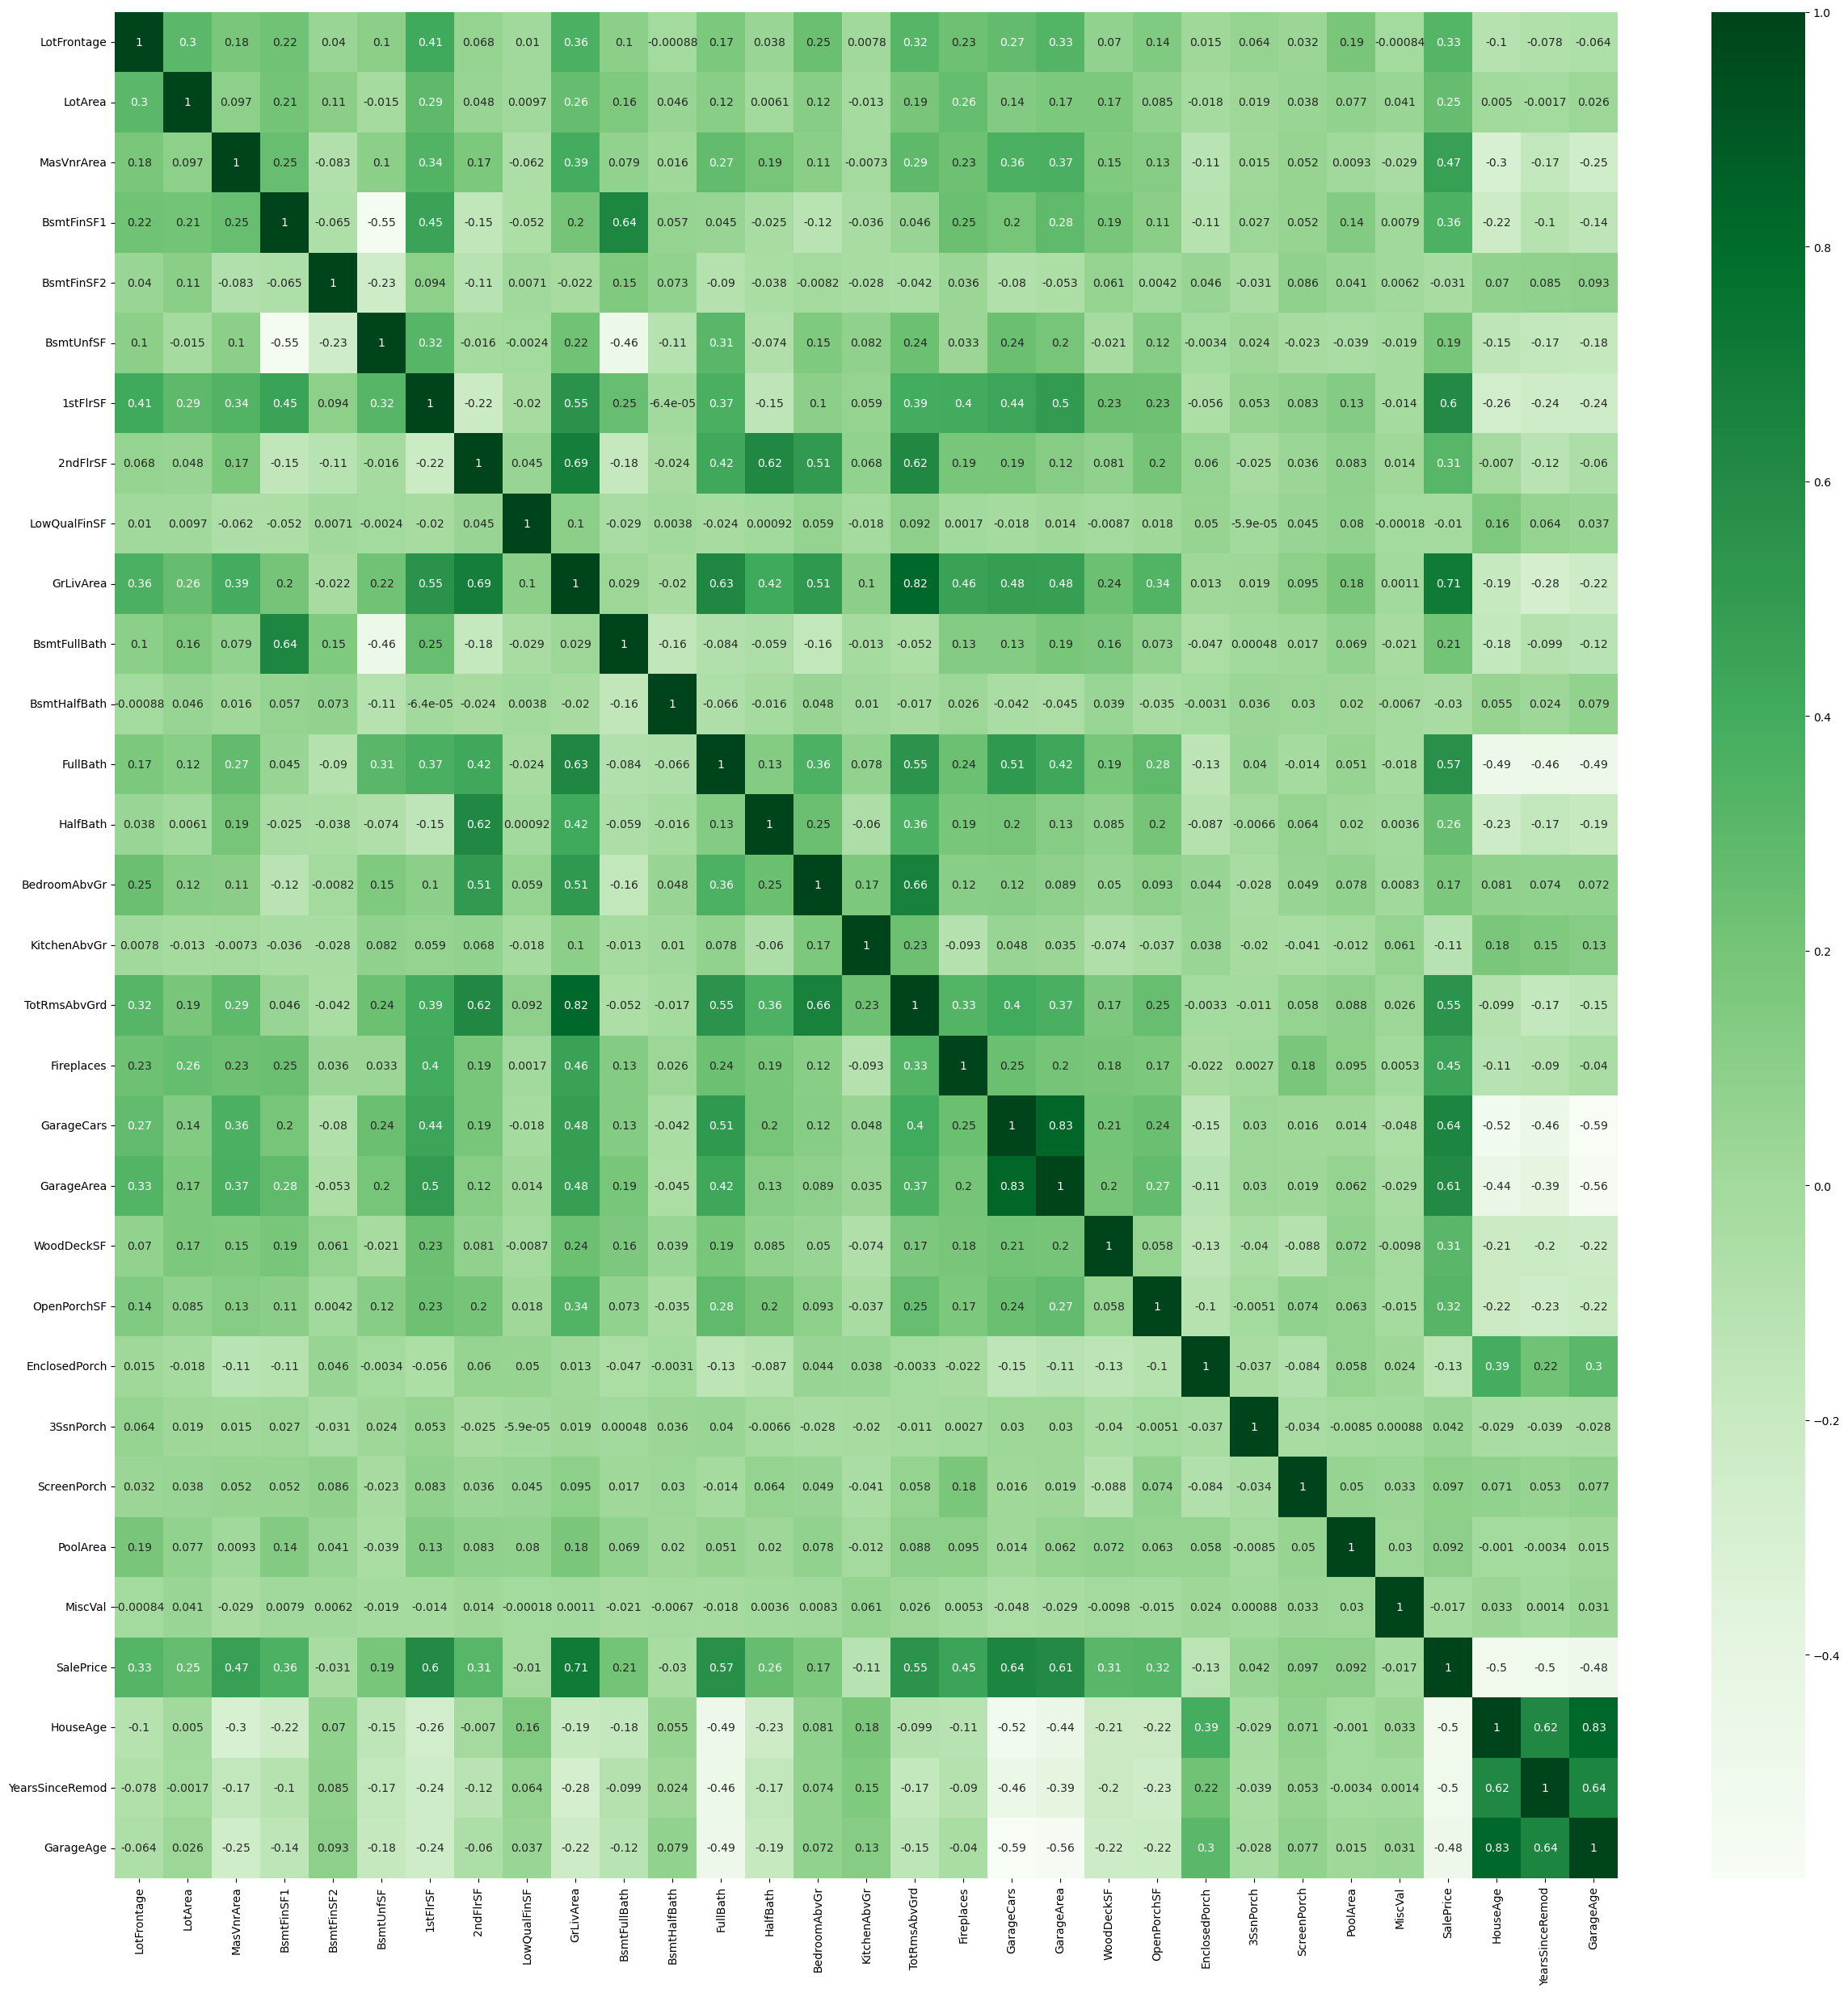

In [35]:
# Using Heatmap to check correlation columns
corrmat = plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),cmap="Greens",annot=True)
plt.show()

In [36]:
# GarageAge and HouseAge have high correlation and GarageCars and GarageArea have high correlation 
# Dropping GarageAge and GarageArea
data.drop(['GarageAge','GarageArea'],axis=1,inplace=True)

### 4. Data Preparation

In [37]:
# Creating dummy variables for categorical columns
data = pd.get_dummies(data=data,columns=cat_cols,drop_first=True)
print(data.shape)

(1338, 249)


In [38]:
data.head(5)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,YearsSinceRemod,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,8,0,2,0,61,0,0,0,0,0,208500,20,20,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,0,0,1262,0,1,2,0,3,1,6,1,2,298,0,0,0,0,0,0,181500,47,47,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,866,0,1786,1,0,2,1,3,1,6,1,2,0,42,0,0,0,0,0,223500,22,21,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,961,756,0,1717,1,0,1,0,3,1,7,1,3,0,35,272,0,0,0,0,140000,108,53,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,192,84,0

In [39]:
# X has all the independent variables
X = data.drop(['SalePrice'], axis=1)

In [40]:
# y contains all the target variables
y = data['SalePrice']

In [41]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)

In [42]:
# Using MinMaxScaler on the Train data
num_cols = ['LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', 
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
       '3SsnPorch','ScreenPorch', 'PoolArea', 
       'MiscVal','HouseAge', 'YearsSinceRemod']

scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,HouseAge,YearsSinceRemod,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1425,0.202055,0.059740,0.151875,0.000000,0.0,0.535959,0.191349,0.000000,0.0,0.156418,0.0,0.0,0.333333,0.0,0.500000,0.0,0.444444,0.000000,0.333333,0.000000,0.096059,0.0,0.0,0.0,0.0,0.0,0.392308,0.850000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
136,0.167808,0.057419,0.122500,0.123140,0.0,0.222175,0.182417,0.000000,0.0,0.149116,0.0,0.0,0.666667,0.0,0.500000,0.0,0.222222,0.333333,0.000000,0.000000,0.273399,0.0,0.0,0.0,0.0,0.0,0.330769,0.716667,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
644,0.219178,0.050013,0.101250,0.198618,0.0,0.276113,0.312177,0.000000,0.0,0.255188,0.5,0.0,0.666667,0.5,0.333333,0.0,0.444444,0.333333,0.666667,0.227538,0.320197,0.0,0.0,0.0,0.0,0.0,0.007692,0.016667,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1231,0.167808,0.040761,0.075000,0.142275,0.0,0.129709

In [43]:
# Scaling the numerical columns in X_test using MinMaxScaler
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,HouseAge,YearsSinceRemod,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
12,0.167808,0.073989,0.00000,0.130581,0.000000,0.074914,0.111425,0.000000,0.0,0.091084,0.5,0.0,0.333333,0.0,0.333333,0.0,0.111111,0.000000,0.000000,0.163361,0.000000,0.000000,0.0,0.4,0.0,0.000000,0.369231,0.800000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
335,0.167808,1.035891,0.00000,0.221297,0.099729,0.044092,0.277621,0.080872,0.0,0.259032,1.0,0.0,0.666667,0.0,0.500000,0.0,0.444444,0.666667,0.333333,0.781797,0.000000,0.000000,0.0,0.0,0.0,0.045161,0.346154,0.750000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
348,0.051370,0.007280,0.06625,0.101524,0.000000,0.081764,0.076634,0.417433,0.0,0.228286,0.5,0.0,0.666667,0.5,0.333333,0.0,0.333333,0.000000,0.333333,0.000000,0.066502,0.000000,0.0,0.0,0.0,0.000000,0.053846,0.100000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
885,0.099315,

### 5. Model building and evaluation

#### Linear Regression

In [44]:
# Fitting the sklearn LinearRegression model
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [45]:
# Using RFE to shortlist features
rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 79),
 ('LotArea', False, 35),
 ('MasVnrArea', False, 101),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 41),
 ('BsmtUnfSF', False, 37),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 15),
 ('GrLivArea', False, 11),
 ('BsmtFullBath', False, 205),
 ('BsmtHalfBath', False, 206),
 ('FullBath', False, 159),
 ('HalfBath', False, 195),
 ('BedroomAbvGr', False, 44),
 ('KitchenAbvGr', False, 2),
 ('TotRmsAbvGrd', False, 82),
 ('Fireplaces', False, 148),
 ('GarageCars', False, 52),
 ('WoodDeckSF', False, 138),
 ('OpenPorchSF', False, 216),
 ('EnclosedPorch', False, 136),
 ('3SsnPorch', False, 73),
 ('ScreenPorch', False, 66),
 ('PoolArea', False, 83),
 ('MiscVal', False, 167),
 ('HouseAge', False, 8),
 ('YearsSinceRemod', False, 197),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 21),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 12),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 24),
 ('MSSubClass_1-STORY PUD (Planned Unit Deve

In [47]:
# Getting columns selected by RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'Condition2_PosN',
       'Condition2_RRAe', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl'],
      dtype='object')

In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_cols]
X_test_rfe = X_test[rfe_cols]

In [49]:
X_train_rfe.head(5)

,BsmtFinSF1,1stFlrSF,2ndFlrSF,Condition2_PosN,Condition2_RRAe,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
1425,0.000000,0.191349,0.000000,0,0,0,0,1,0,1,0,0,0,0,0
136,0.123140,0.182417,0.000000,0,0,1,0,0,0,1,0,0,0,0,0
644,0.198618,0.312177,0.000000,0,0,1,0,0,0,1,0,0,0,0,0
1231,0.142275,0.176775,0.000000,0,0,0,0,1,0,1,0,0,0,0,0
222,0.097449,0.087682,0.358838,0,0,1,0,0,0,1,0,0,0,0,0


In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

X_test_rfe = sm.add_constant(X_test_rfe)

In [51]:
# Using statsmodel OLS method to fit the training data
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [52]:
# Predicting y values for test data
y_pred_test = lm.predict(X_test_rfe)

In [53]:
# Checking the metrics
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = round(r2_score(y_train, y_pred_train),2)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = round(r2_score(y_test, y_pred_test),2)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.67
0.38
2230251488651.2983
940854648051.3845
2084347185.655419
3510651671.833524


#### Ridge Regression 

In [54]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [55]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [56]:
#Fitting Ridge model for alpha = 8 and printing coefficients which have been penalised
alpha = 8.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.60804281e+03  7.02024358e+03  2.26860565e+04  1.14842457e+04
  2.92097538e+03  6.68146503e+03  3.01957560e+04  4.59744524e+04
  3.39907599e+03  4.33002041e+04  1.11755596e+04  4.46181503e+02
  3.11355599e+04  9.53457934e+03  3.09390512e+03 -1.18560492e+04
  3.63297299e+04  1.99242340e+04  3.45377845e+04  1.42977147e+04
  1.28590323e+03  7.92777171e+03  7.59374262e+03  1.13736526e+04
  4.47146739e+03 -5.53227560e+02 -8.70805532e+03 -1.04231982e+04
  3.56446420e+03 -1.11010510e+03  8.76473245e+03 -7.80841112e+03
  1.07606076e+03 -2.95033419e+03  5.27966545e+03  6.13367437e+03
  4.32289703e+02 -9.45135812e+03 -5.52863879e+02 -3.95711078e+03
 -2.68896801e+03  9.44593461e+01  7.35829438e+03  4.26741277e+03
  8.41330624e+03  1.16377144e+03  8.94488995e+03  7.21037707e+03
 -1.14357596e+04 -3.15116665e+03  1.45368034e+04  2.52137467e+03
  1.14394234e+04 -3.79495502e+03  1.05318043e+04 -9.29277112e+03
 -1.45479247e+03 -1.74837073e+03  6.57508545e+03 -5.06674501e+03
 -9.76008969e+02 -3.17113

In [57]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = round(r2_score(y_train, y_pred_train),2)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = round(r2_score(y_test, y_pred_test),2)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.89
0.87
780921657817.6223
194336977292.02142
729833325.0631984
725137974.9702291


#### Lasso Regression

In [58]:
# Creating Lasso Regression object
lasso = Lasso()

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,200,300,400, 
 500, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 41 candidates, totalling 205 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 300, 400, 500, ...]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [59]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 300}


In [60]:
#Fitting Lasso model for alpha = 300 and printing coefficients which have been penalised

alpha = 300

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

print(lasso.coef_)

[-0.00000000e+00  0.00000000e+00  3.40067441e+03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  3.19663326e+04
 -0.00000000e+00  1.41591724e+05  5.24501411e+03 -0.00000000e+00
  1.91916610e+04  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  2.76443514e+04  2.04828113e+04  3.84817536e+04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.11331993e+03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.42489638e+04
  9.82049114e+01 -0.00000000e+00  1.59133506e+04 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -8.34364072e+03 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.34739369e+03 -3.39579239e+03  0.00000000e+00  2.33948260e+03
 -0.00000000e+00 -2.61895076e+03  0.00000000e+00  0.00000000e+00
  1.50288554e+03 -0.00000000e+00  1.06562907e+04 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000

In [61]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = round(r2_score(y_train, y_pred_train),2)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = round(r2_score(y_test, y_pred_test),2)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.86
0.86
918929141016.0853
210522628082.1761
858812281.3234442
785532194.3364779


In [62]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),6.700000e-01,8.900000e-01,8.600000e-01
1,R2 Score (Test),3.800000e-01,8.700000e-01,8.600000e-01
2,RSS (Train),2.230251e+12,7.809217e+11,9.189291e+11
3,RSS (Test),9.408546e+11,1.943370e+11,2.105226e+11
4,MSE (Train),4.565465e+04,2.701543e+04,2.930550e+04
5,MSE (Test),5.925075e+04,2.692839e+04,2.802735e+04


### Ridge and Lasso regression models have almost similar performance in terms of R2_Score
### we will be going with Lasso because it has less coefficients than Ridge regression


In [63]:
# Creating a table with the comparison of coefficients for each type of model
betas = pd.DataFrame(index=(X.columns))

In [64]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [65]:
pd.set_option('display.max_rows', None)
betas.head(300)

,Linear,Ridge,Lasso
LotFrontage,NaN,-2608.042814,-0.000000
LotArea,NaN,7020.243585,0.000000
MasVnrArea,NaN,22686.056471,3400.674406
BsmtFinSF1,206067.106705,11484.245664,0.000000
BsmtFinSF2,NaN,2920.975377,-0.000000
BsmtUnfSF,NaN,6681.465032,0.000000
1stFlrSF,590715.595970,30195.756041,0.000000
2ndFlrSF,197615.763956,45974.452424,31966.332649
LowQualFinSF,NaN,3399.075985,-0.000000
GrLivArea,NaN,43300.204058,141591.724412


## Conclusion

#### TOP five features as per The Lasso regression model

GrLivArea

OverallQual_Excellent

OverallQual_Very Excellent

Neighborhood_NoRidge

RoofMatl_WdShngl


In [66]:
coefficients = betas[betas['Lasso'] != 0].sort_values(by=['Lasso'], ascending=False)
coefficients['Lasso'].head(5)

GrLivArea                     141591.724412
OverallQual_Excellent          68478.522800
OverallQual_Very Excellent     63224.854689
Neighborhood_NoRidge           49069.898497
RoofMatl_WdShngl               38976.333051
Name: Lasso, dtype: float64

#### Questions

In [67]:
X_train_q = X_train.drop(['GrLivArea','OverallQual_Excellent','OverallQual_Very Excellent','Neighborhood_NoRidge','RoofMatl_WdShngl'],axis=1)

In [68]:
X_test_q = X_test.drop(['GrLivArea','OverallQual_Excellent','OverallQual_Very Excellent','Neighborhood_NoRidge','RoofMatl_WdShngl'],axis=1)

In [69]:
# Creating Lasso Regression object
lasso = Lasso()

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,200,300,400, 
 500, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_q, y_train) 

Fitting 5 folds for each of 41 candidates, totalling 205 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 300, 400, 500, ...]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [70]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 300}


In [71]:
#Fitting Lasso model for alpha = 300 and printing coefficients which have been penalised

alpha = 300

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_q, y_train) 

Lasso(alpha=300)

In [72]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_q)
y_pred_test = lasso.predict(X_test_q)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8401663363165475
0.8448716594886897
1087872967753.609
234756302192.42712
1016703708.180943
875956351.4642804


In [73]:
lasso.coef_

array([     0.        ,      0.        ,  32358.62932617,      0.        ,
           -0.        ,      0.        , 133446.81301967, 105598.9939016 ,
            0.        ,   5294.94053034,     -0.        ,  16569.8618624 ,
            0.        ,     -0.        ,   -868.70067214,  27328.98323908,
        22553.72050285,  44098.2386705 ,   9280.85508353,      0.        ,
            0.        ,      0.        ,   1390.06234663,      0.        ,
           -0.        ,     -0.        , -12225.73557741,      0.        ,
            0.        ,  17784.44392467,     -0.        ,      0.        ,
           -0.        ,      0.        ,     -0.        ,      0.        ,
        -8169.98371299,     -0.        ,     -0.        ,     -0.        ,
           -0.        ,      0.        ,      0.        ,    841.98963219,
        -5496.55063623,      0.        ,   1902.056088  ,     -0.        ,
        -3755.62931987,      0.        ,      0.        ,   1589.66516739,
           -0.        ,  

In [74]:
# Creating a table with the comparison of coefficients for each type of model
betas1 = pd.DataFrame(index=(X_train_q.columns))

In [75]:
betas1["Lasso"] = lasso.coef_

In [76]:
betas1.sort_values(by='Lasso',ascending=False)

,Lasso
1stFlrSF,133446.813020
2ndFlrSF,105598.993902
GarageCars,44098.238671
Neighborhood_StoneBr,34739.709623
MasVnrArea,32358.629326
TotRmsAbvGrd,27328.983239
Neighborhood_NridgHt,24909.204317
BsmtExposure_Gd,23790.863002
Fireplaces,22553.720503
MSSubClass_1-STORY 1946 & NEWER ALL STYLES,17784.443925
